In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import attila_utils

In [2]:
fpath = '../../resources/QPS/5xFAD-mouse/CO28152_NFL-GFAP_datasum.xlsx'
nfl_invivo = pd.read_excel(fpath, sheet_name='NFL in vivo clean')
nfl_invivo = nfl_invivo.melt(id_vars=['Cohort', 'Group', 'IRN', 'Sex', 'Genotype'], value_name='NF-L')
nfl_invivo['Week'] = nfl_invivo.variable.str.replace('NF-L week ', '').astype(int)
nfl_invivo

,Cohort,Group,IRN,Sex,Genotype,variable,NF-L,Week
0,I,A,15117,f,tg/wt,NF-L week 0,576.0,0
1,I,A,15119,f,tg/wt,NF-L week 0,698.0,0
2,I,A,14627 A,f,tg/wt,NF-L week 0,701.0,0
3,III,A,15161,f,tg/wt,NF-L week 0,574.0,0
4,II,A,15938,m,tg/wt,NF-L week 0,291.0,0
...,...,...,...,...,...,...,...,...
231,V,J,15195 A,f,wt/wt,NF-L week 12,42.0,12
232,VI,J,15251,f,wt/wt,NF-L week 12,35.0,12
233,V,J,16180,m,wt/wt,NF-L week 12,24.0,12
234,V,J,16192,m,wt/wt,NF-L week 12,44.0,12


['named-figure/NF-L-in-vivo.png', 'named-figure/NF-L-in-vivo.pdf']

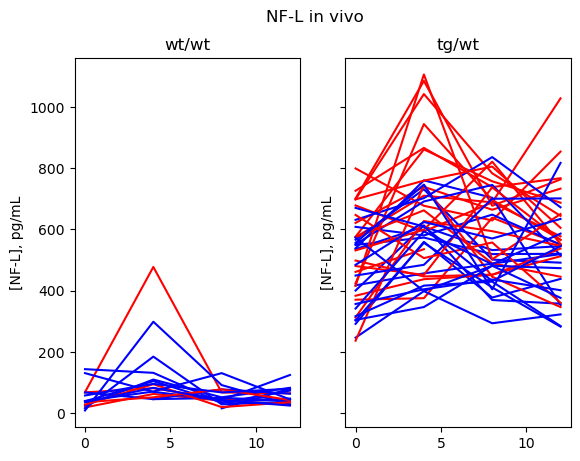

In [3]:
def line_plotter(nfl_df, x='Week', y='NF-L', marker=''):
    fig, ax = plt.subplots(1, 2, sharey=True)
    for axi, genotype in zip(ax, nfl_df.Genotype.sort_values(ascending=False).unique()):
        df_genotype = nfl_df.loc[nfl_df.Genotype == genotype]
        axi.set_title(genotype)
        axi.set_ylabel('[NF-L], pg/mL')
        for irn in df_genotype.IRN.unique():
            df = df_genotype.loc[df_genotype.IRN == irn]
            sex = df.Sex.unique()[0]
            color = {'m': 'blue', 'f': 'red'}[sex]
            #marker = '$' + df.Group.unique()[0] + '$'
            axi.plot(x, y, data=df, color=color, marker=marker)
    return((fig, ax))

fig, ax = line_plotter(nfl_invivo, x='Week', y='NF-L')
fig.suptitle('NF-L in vivo')
attila_utils.savefig(fig, 'NF-L-in-vivo')

In [4]:
fpath = '../../resources/QPS/5xFAD-mouse/CO28152_NFL-GFAP_datasum.xlsx'
nfl_term = pd.read_excel(fpath, sheet_name='NFL terminal clean')
s = nfl_term.iloc[:, -2:].mean()
scaler = s.loc['NF-L terminal plasma'] / s.loc['NF-L CSF']
nfl_term['NF-L CSF'] = nfl_term['NF-L CSF'] * scaler
nfl_term_scaled = nfl_term.melt(id_vars=['Cohort', 'Group', 'IRN', 'Sex', 'Genotype'], value_name='NF-L', var_name='Location')
nfl_term_scaled['x'] = nfl_term_scaled.Location.apply(lambda x: {'NF-L terminal plasma': 0, 'NF-L CSF': 1}[x])
nfl_term_scaled

,Cohort,Group,IRN,Sex,Genotype,Location,NF-L,x
0,I,A,15117,f,tg/wt,NF-L terminal plasma,1679.000000,0
1,I,A,15119,f,tg/wt,NF-L terminal plasma,828.000000,0
2,I,A,14627 A,f,tg/wt,NF-L terminal plasma,1102.000000,0
3,III,A,15161,f,tg/wt,NF-L terminal plasma,657.000000,0
4,II,A,15938,m,tg/wt,NF-L terminal plasma,482.000000,0
...,...,...,...,...,...,...,...,...
113,V,J,15195 A,f,wt/wt,NF-L CSF,22.339395,1
114,VI,J,15251,f,wt/wt,NF-L CSF,22.644369,1
115,V,J,16180,m,wt/wt,NF-L CSF,19.594623,1
116,V,J,16192,m,wt/wt,NF-L CSF,10.483504,1


In [5]:
scaler

0.038121834155207306

['named-figure/NF-L-terminal.png', 'named-figure/NF-L-terminal.pdf']

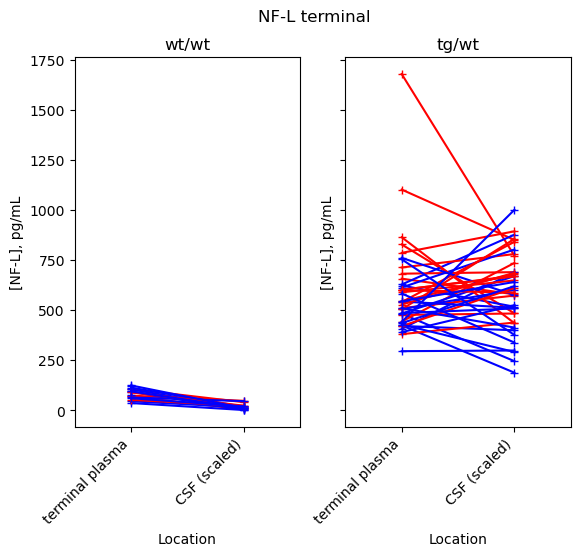

In [6]:
fig, ax = line_plotter(nfl_term_scaled, x='x', y='NF-L', marker='+')
fig.suptitle('NF-L terminal')
for axi in ax:
    axi.set_xlim([-0.5, 1.5])
    axi.set_xticks([0, 1])
    axi.set_xticklabels(['terminal plasma', 'CSF (scaled)'], rotation=45, ha='right')
    axi.set_xlabel('Location')
attila_utils.savefig(fig, 'NF-L-terminal')

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

['named-figure/NFL-terminal-CSF-scatter.png',
 'named-figure/NFL-terminal-CSF-scatter.pdf']

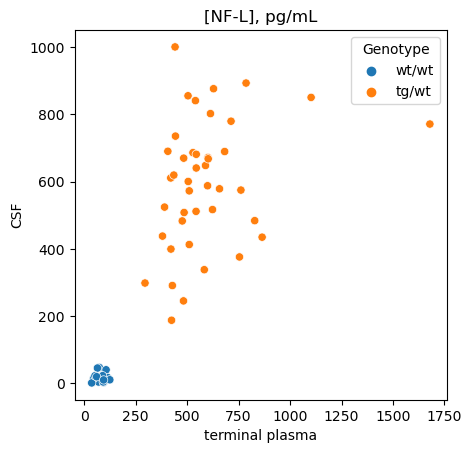

In [7]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ax = sns.scatterplot(x='NF-L terminal plasma', y='NF-L CSF', hue='Genotype', hue_order=['wt/wt', 'tg/wt'], data=nfl_term, ax=ax)
ax.set_xlabel('terminal plasma')
ax.set_ylabel('CSF')
ax.set_title('[NF-L], pg/mL')
attila_utils.savefig(fig, 'NFL-terminal-CSF-scatter')

In [8]:
fpath = '../../resources/QPS/5xFAD-mouse/CO28152_NFL-GFAP_datasum.xlsx'
gfap = pd.read_excel(fpath, sheet_name='GFAP plasma clean')
gfap

,Cohort,Group,IRN,Sex,Genotype,GFAP terminal plasma
0,I,A,15117,f,tg/wt,42981.0
1,I,A,15119,f,tg/wt,50086.0
2,I,A,14627 A,f,tg/wt,28913.0
3,III,A,15161,f,tg/wt,27315.0
4,II,A,15938,m,tg/wt,48708.0
5,IV,A,16122,m,tg/wt,13124.0
6,I,B,15127,f,tg/wt,34114.0
7,IV,B,15201,f,tg/wt,88214.0
8,V,B,15245,f,tg/wt,47545.0
9,I,B,15928,m,tg/wt,NaN


/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

['named-figure/GFAP-swarmplot.png', 'named-figure/GFAP-swarmplot.pdf']

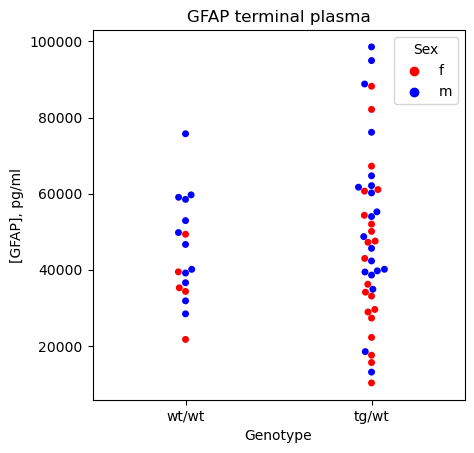

In [9]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
sns.swarmplot(data=gfap, x='Genotype', y='GFAP terminal plasma', hue='Sex',
              order=['wt/wt', 'tg/wt'], palette={'m': 'blue', 'f': 'red'}, ax=ax)
ax.set_ylabel('[GFAP], pg/ml')
ax.set_title('GFAP terminal plasma')
attila_utils.savefig(fig, 'GFAP-swarmplot')

In [10]:
%connect_info

{
  "shell_port": 58344,
  "iopub_port": 58345,
  "stdin_port": 58346,
  "control_port": 58348,
  "hb_port": 58347,
  "ip": "127.0.0.1",
  "key": "91777b95-463ae6c3c460f09cb7b19ea9",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-9616787d-e771-4cc5-98dd-fccbecdfb16f.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
